# Import and combine raw datasets

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
from joblib import Parallel, delayed
import re
import matplotlib.pyplot as plt

d = './raw_data/'

#### Import and merge datasets
We will import data from 3 distinct sources and attempt to combine them to generate the most complete dataset that we can.

In [17]:
# source 1: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data?select=movies_metadata.csv
movie_meta = pd.read_csv(d + "rounakbanik/movies_metadata.csv", 
                         converters={'id': lambda x: pd.to_numeric(x, errors='coerce'),
                                       'budget': lambda x: pd.to_numeric(x, errors='coerce'),
                                    'release_date': lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors = 'coerce')})
credits = pd.read_csv(d + "rounakbanik/credits.csv",
                           converters={'id': lambda x: pd.to_numeric(x, errors='coerce')})

# Merge movie meta data and credits, and remove duplicates
df_source_1 = movie_meta.drop_duplicates(subset = "id").merge(credits.drop_duplicates(subset = "id"), on='id').drop_duplicates(subset = "imdb_id")

# source 2: https://www.kaggle.com/datasets/aditya126/movies-box-office-dataset-2000-2024
enhanced_boxoffice = pd.read_csv(d + "aditya126/enhanced_box_office_data(2000-2024)u.csv")

# source 3: https://www.kaggle.com/datasets/rajugc/imdb-movies-dataset-based-on-genre
imbd_genre_list = os.listdir(d + 'rajugc/')
imported_imbd_genre = []

for filename in imbd_genre_list:
    imported = pd.read_csv(d + 'rajugc/' + filename)
    imported['rajugc_genre'] = filename[:-4]
    imported_imbd_genre.append(imported)

stacked_imbd_genre = pd.DataFrame(np.vstack(imported_imbd_genre), columns = imported_imbd_genre[0].columns.tolist()).drop_duplicates(subset = "movie_id")

/var/folders/_q/50__mrnj2zv6hb8crhk3q46m0000gn/T/ipykernel_11809/3090904558.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_meta = pd.read_csv(d + "rounakbanik/movies_metadata.csv",


In [18]:
# Inspect data from source 1
df_source_1.info()
df_source_1.describe(include = "all").T

<class 'pandas.core.frame.DataFrame'>
Index: 45416 entries, 0 to 45431
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45416 non-null  object        
 1   belongs_to_collection  4486 non-null   object        
 2   budget                 45416 non-null  float64       
 3   genres                 45416 non-null  object        
 4   homepage               7773 non-null   object        
 5   id                     45416 non-null  float64       
 6   imdb_id                45415 non-null  object        
 7   original_language      45405 non-null  object        
 8   original_title         45416 non-null  object        
 9   overview               44464 non-null  object        
 10  popularity             45413 non-null  object        
 11  poster_path            45035 non-null  object        
 12  production_companies   45413 non-null  object        
 13  produc

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
adult,45416,2,False,45407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
belongs_to_collection,4486,1693,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,45416.0,NaN,NaN,NaN,4226075.207834,0.0,0.0,0.0,0.0,380000000.0,17431068.811523
genres,45416,4065,"[{'id': 18, 'name': 'Drama'}]",4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homepage,7773,7669,http://www.georgecarlin.com,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,45416.0,NaN,NaN,NaN,108354.834574,2.0,26450.75,59994.0,157337.75,469172.0,112458.583528
imdb_id,45415,45415,tt0114709,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_language,45405,89,en,32239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_title,45416,43356,Hamlet,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overview,44464,44291,No overview found.,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Inspect data from source 2
enhanced_boxoffice.info()
enhanced_boxoffice.describe(include = "all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  5000 non-null   int64  
 1   Release Group         5000 non-null   object 
 2   $Worldwide            5000 non-null   float64
 3   $Domestic             5000 non-null   float64
 4   Domestic %            5000 non-null   float64
 5   $Foreign              5000 non-null   float64
 6   Foreign %             5000 non-null   float64
 7   Year                  5000 non-null   int64  
 8   Genres                4822 non-null   object 
 9   Rating                4830 non-null   object 
 10  Vote_Count            4830 non-null   float64
 11  Original_Language     4830 non-null   object 
 12  Production_Countries  4800 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 507.9+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,5000.0,NaN,NaN,NaN,100.5,57.74008,1.0,50.75,100.5,150.25,200.0
Release Group,5000,4955,Hero,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$Worldwide,5000.0,NaN,NaN,NaN,119213693.2098,200524343.217415,1666028.0,24662197.25,48446575.0,119758766.5,2799439100.0
$Domestic,5000.0,NaN,NaN,NaN,44725232.97,77270255.71366,0.0,92751.5,17984212.0,53868472.25,936662225.0
Domestic %,5000.0,NaN,NaN,NaN,35.74062,30.656992,0.0,0.2,37.05,57.8,100.0
$Foreign,5000.0,NaN,NaN,NaN,74488092.7352,133493209.856677,0.0,13710340.5,30194438.0,72115778.25,1993811448.0
Foreign %,5000.0,NaN,NaN,NaN,64.25664,30.654531,0.0,42.2,62.95,99.8,100.0
Year,5000.0,NaN,NaN,NaN,2012.0,7.211824,2000.0,2006.0,2012.0,2018.0,2024.0
Genres,4822,1317,Comedy,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,4830,1829,6.5/10,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Inspect data from source 3
stacked_imbd_genre.info()
stacked_imbd_genre.describe(include = "all").T

<class 'pandas.core.frame.DataFrame'>
Index: 243197 entries, 0 to 368299
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   movie_id      243197 non-null  object
 1   movie_name    243195 non-null  object
 2   year          204294 non-null  object
 3   certificate   55092 non-null   object
 4   runtime       159718 non-null  object
 5   genre         243197 non-null  object
 6   rating        138691 non-null  object
 7   description   243197 non-null  object
 8   director      222358 non-null  object
 9   director_id   222358 non-null  object
 10  star          198858 non-null  object
 11  star_id       204115 non-null  object
 12  votes         138693 non-null  object
 13  gross(in $)   12008 non-null   object
 14  rajugc_genre  243197 non-null  object
dtypes: object(15)
memory usage: 29.7+ MB


,count,unique,top,freq
movie_id,243197,243197,tt5433140,1
movie_name,243195,213572,Alone,35
year,204294,216,2022,7578
certificate,55092,42,Not Rated,16596
runtime,159718,365,90 min,11605
genre,243197,1745,Horror,16050
rating,138691.0,91.0,6.2,5050.0
description,243197,186759,Add a Plot,54449
director,222358,103466,Godfrey Ho,120
director_id,222358,96485,/name/nm0061792/,131


#### Missing data analysis

In [15]:
# Summarize missing values by dataset
df_source_1.isnull().sum()

adult                        0
belongs_to_collection    40930
budget                       0
genres                       0
homepage                 37643
id                           0
imdb_id                      1
original_language           11
original_title               0
overview                   952
popularity                   3
poster_path                381
production_companies         3
production_countries         3
release_date                84
revenue                      3
runtime                    258
spoken_languages             3
status                      84
tagline                  25018
title                        3
video                        3
vote_average                 3
vote_count                   3
cast                         0
crew                         0
dtype: int64

budget     36537
revenue    38015
runtime     1553
dtype: int64

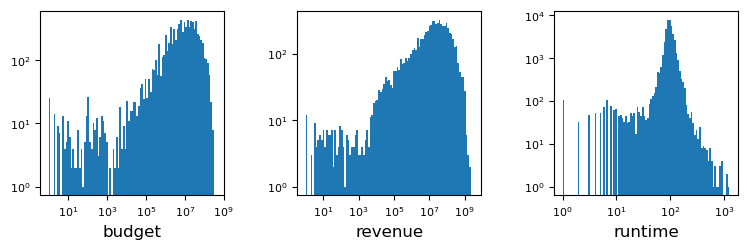

In [16]:
# Inspect distribution of observables
sel = ['budget', 'revenue', 'runtime']

fig, axs = plt.subplots(1, len(sel), figsize=(3*len(sel), 3), sharex=False, sharey=False)

for i, var in enumerate(sel):
    axs[i].hist(df_source_1[var], bins=np.logspace(0,np.log10(np.amax(df_source_1[var])), 100), log = True);
    axs[i].semilogx()
    axs[i].minorticks_off()
    axs[i].yaxis.set_tick_params(labelbottom=True)
    axs[i].xaxis.set_tick_params(labelbottom=True)
    axs[i].tick_params(axis='both', which='major', labelsize=8)
    axs[i].set_box_aspect(1)
    axs[i].set_xlabel(var, fontsize = 12)

fig.subplots_adjust(wspace=.4, hspace=.35)
df_source_1[sel].eq(0).sum()

In [9]:
# If budget == 0, set to missing
msn_or_zero = df_source_1.copy()
msn_or_zero[sel] = df_source_1[sel].replace(0, np.nan)

In [10]:
!pip install missingno

In [11]:
import missingno as msno

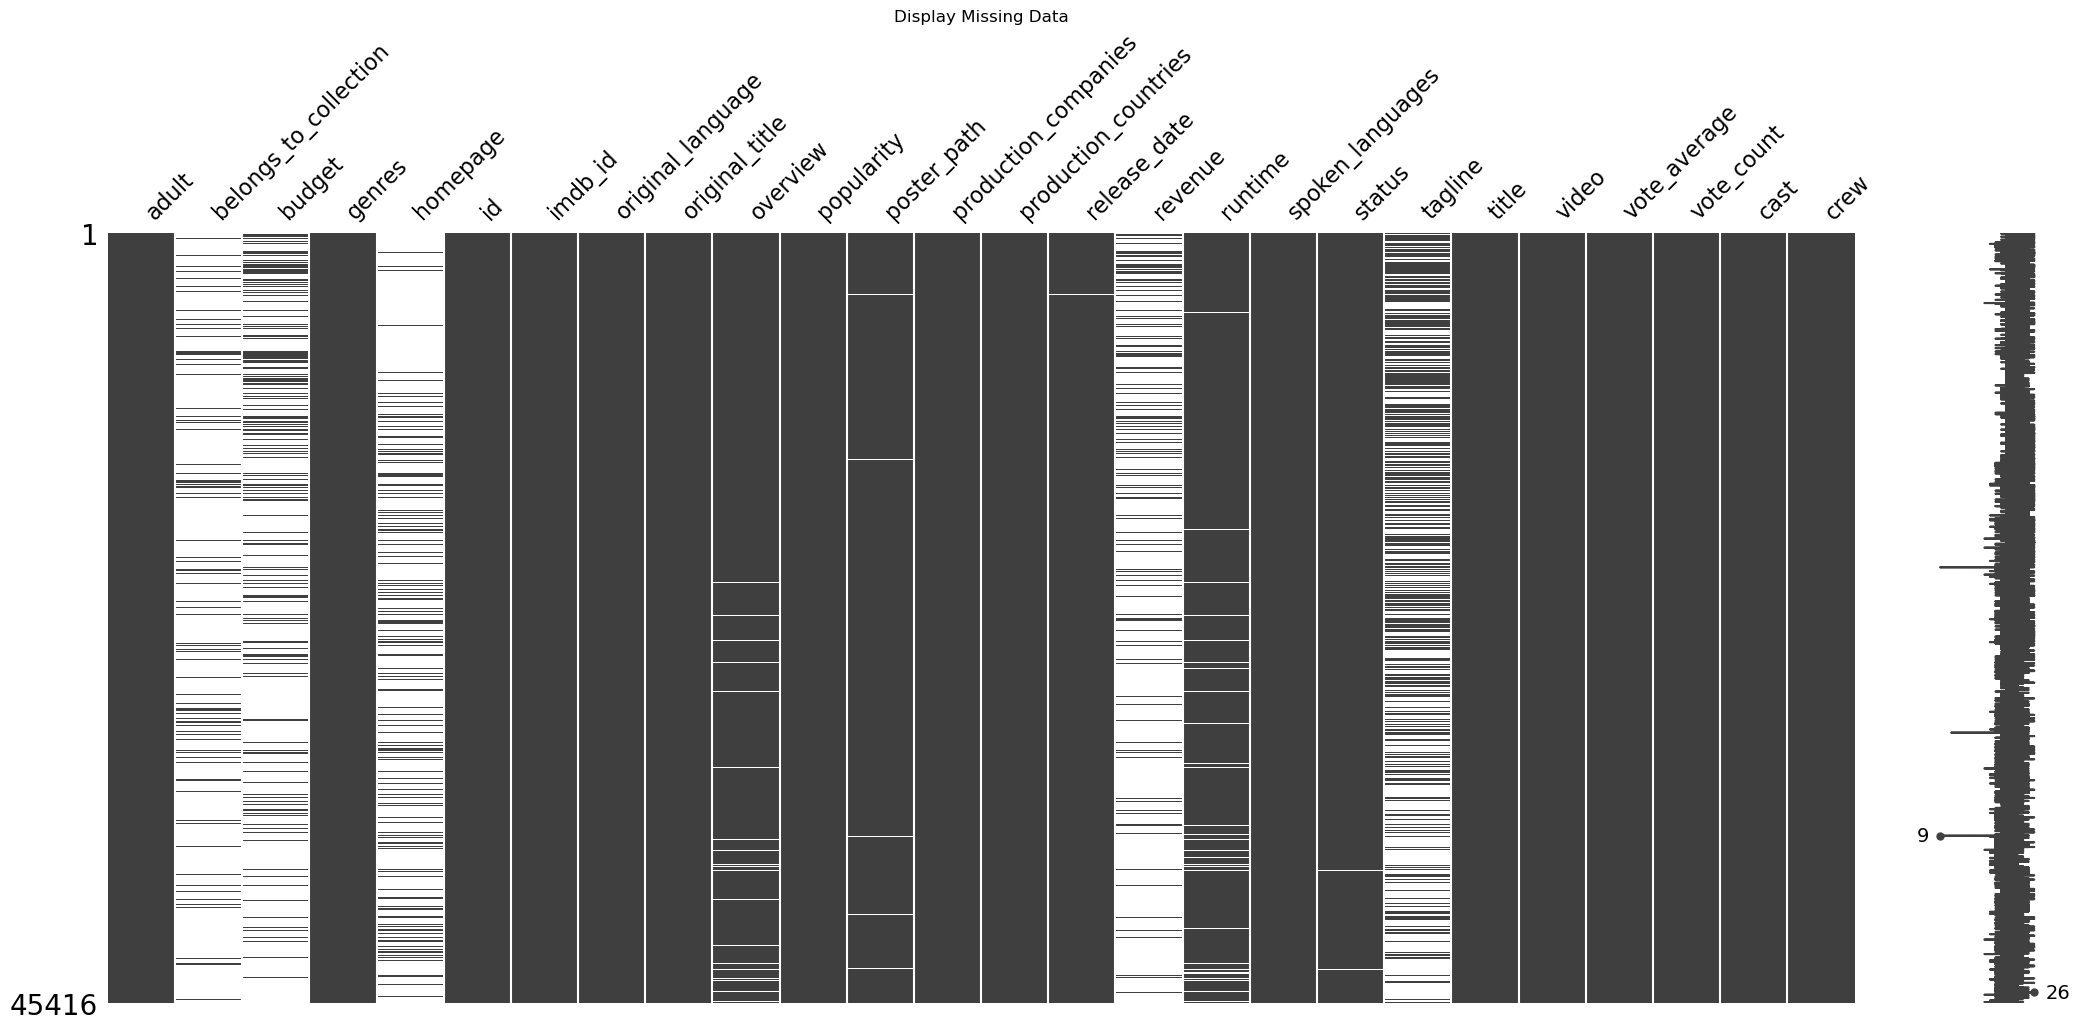

In [12]:
# A visual representation showing structure of missing data
msno.matrix(msn_or_zero)
plt.title("Display Missing Data")
plt.show()